<font color="red">3.1 Question:</font> Explore the PropBank concepts used in the AMR graphs provided in `key_penmans.amr`. What concepts are used to represent the term _justice_? Which one of these concepts are actually part of PropBank (provide the link to the concept's frame for these)? Which ones are not part of PropBank? Where do these concept come from? 

<font color="orange">3.1 Answer:</font> 

For this part, we first had to process our file containing the AMR graph information. Indeed, we had multi-sentence entries that we had to split.

AMR graphs give access to an abstraction of the semantic structure of the original sentences. Here, we are interested in the term _justice_, its semantic relations, and its semantic role in different contexts. In terms of AMR structure, we want to analyze the following elements:
- the position of the term _justice_ in the AMR graph (root/node/leaf);
- the parents (superior concepts) of the term _justice_;
- the siblings (concepts with the same parent) of the term _justice_;
- the children (inferior concepts) of the term _justice_;
- the relationships linking _justice_ to its parents and its children.

**Results:**  
- Total number of occurrences of *justice*: **520**  
- Number of distinct concepts: **434**

**Examples of concepts found:**  
```
(j / justice)                                      (53 times)
(s / system :mod (j / justice))                    (10 times)
(a / approach-02 :ARG1 (j / justice :mod (d / data)))  (3 times)
(u / url-entity :value "...court-of-justice...")   (2 times)
```

---

#### Concepts belonging to PropBank
No concept containing *justice* directly belongs to PropBank.  
PropBank only covers **verbs** (such as `judge-01`, `justify-01`, etc.).

Examples of related frames:  
- [judge-01](https://verbs.colorado.edu/propbank/framesets-english-aliases/judge-01.html)  
- [justify-01](https://verbs.colorado.edu/propbank/framesets-english-aliases/justify-01.html)  
- [punish-01](https://verbs.colorado.edu/propbank/framesets-english-aliases/punish-01.html)

---

#### Non-PropBank concepts
Concepts such as `(j / justice)` or `(s / system :mod (j / justice))` **do not come from PropBank**.  
They come from the **AMR ontology**, which includes **nouns, adjectives, and entities** absent from PropBank.

---

**Conclusion:**  
In `key_penmans.amr`, *justice* is represented by **nominal AMR concepts** (such as `(j / justice)` or *justice system*).  
There is **no PropBank frame** for *justice*, since it is a **noun**, not a **verb**.  
PropBank frames related to the justice domain mainly concern **verbs** such as *judge*, *justify*, or *punish*.


In [ ]:
import re
from collections import Counter
from pathlib import Path

AMR_FILE = "data/justice_AMR-500-flattened.amr"
CONTEXT_CHARS = 40  

with open(AMR_FILE, encoding="utf-8") as f:
    content = f.read()

pattern = r'\([a-z0-9]+\s*/\s*([a-z0-9_-]+)'
all_concepts = re.findall(pattern, content, re.IGNORECASE)
justice_concepts = [c for c in all_concepts if 'justice' in c.lower()]

counter = Counter(justice_concepts)

is_propbank = lambda c: bool(re.match(r'^[a-z]+-\d{2}$', c, re.IGNORECASE))
propbank = {c: cnt for c, cnt in counter.items() if is_propbank(c)}
non_propbank = {c: cnt for c, cnt in counter.items() if not is_propbank(c)}

justice_matches = []
for match in re.finditer(r'\([a-z0-9]+\s*/\s*justice', content, re.IGNORECASE):
    start = max(0, match.start() - CONTEXT_CHARS)
    end = min(len(content), match.end() + CONTEXT_CHARS)
    snippet = content[start:end].replace('\n', ' ')
    justice_matches.append(snippet)

print("="*60)
print("JUSTICE CONCEPTS IN AMR")
print("="*60)
print(f"\nTotal: {len(justice_concepts)} occurrences")
print(f"Distinct: {len(counter)} concepts\n")

print("ALL CONCEPTS:")
for concept, count in counter.most_common():
    print(f"  • {concept:<25} ({count}x)")

print("\n" + "-"*60)
print("PROPBANK CONCEPTS:")
if propbank:
    for concept, count in sorted(propbank.items()):
        url = f"https://verbs.colorado.edu/propbank/framesets-english-aliases/{concept.lower()}.html"
        print(f"  • {concept} ({count}x)\n    {url}")
else:
    print("  None → 'justice' is a noun; PropBank has verb frames")

print("\n" + "-"*60)
print("NON-PROPBANK CONCEPTS:")
for concept, count in sorted(non_propbank.items()):
    print(f"  • {concept} ({count}x)")

print("\n" + "-"*60)
print("EXAMPLES WITH CONTEXT:")
for snippet in justice_matches[:20]:  # affiche les 20 premiers exemples
    print(f"  • ...{snippet}...")

print("\nSOURCES:")
print("  • Common nouns → OntoNotes lexicon")
print("  • Named entities → AMR conventions")
print("  • Standard English vocabulary")
print("="*60)

JUSTICE CONCEPTS IN AMR

Total: 346 occurrences
Distinct: 1 concepts

ALL CONCEPTS:
  • justice                   (346x)

------------------------------------------------------------
PROPBANK CONCEPTS:
  None → 'justice' is a noun; PropBank has verb frames

------------------------------------------------------------
NON-PROPBANK CONCEPTS:
  • justice (346x)

------------------------------------------------------------
EXAMPLES WITH CONTEXT:
  • ...   :op1 (e / equal-01)             :op2 (j / justice)             :op3 (e2 / equity)        ...
  • ...2 / system                         :mod (j / justice)                         :mod (s3 / sub...
  • ...                                   :op2 (j / justice))))                   :location-of (s2 ...
  • ...                                   :op2 (j / justice)                                       ...
  • ...    :op1 (l / liberty)             :op2 (j / justice))       :op2 (p / possible-01          ...
  • ...                                

In our AMR extraction, justice is represented by nominal AMR concepts (like (j / justice)).
There is no PropBank frame for justice, because it is a noun and not a verb.
The PropBank frames related to the domain of justice instead concern verbs such as:
	•	judge: https://propbank.github.io/v3.4.0/frames/alias-judge.html#judge
	•	justify: https://propbank.github.io/v3.4.0/frames/alias-justify.html#justify


In AMR, compound expressions like social justice or Justice Department are usually not single tokens. AMR represents their meaning using relations like :mod for modifiers and :name/:wiki for named entities.

**Example 1 - Social Justice**:

Natural language: social justice
AMR representation:
(j / justice
:mod (s / social))
Explanation: justice is the main concept, social is a modifier attached via :mod.

**Example 2 - Justice Department**:

Natural language: Justice Department
AMR representation:
(o / organization
:name (n / name :op1 "Justice" :op2 "Department"))
Explanation: Justice is part of a string in the :name role, not a concept node. It may also appear in a :wiki entry.

**Summary**:

* Social justice is represented with a concept and a modifier.
* Justice Department is represented with a string in :name or :wiki, not as a concept.


<font color="red">3.2 Question:</font> Explore the structure of the AMR graphs provided in `key_penmans.amr`. Please provide visualisations and comments for each of the explored elements.

<font color="orange">3.2 Answer:</font> 

For this part, we use the metamorphosed tool developped by Orange: https://github.com/Orange-OpenSource/metamorphosed. Sadly, some content of our .amr file was somehow corrupted, or at least not recognized by metamorphosed.  

Nethertheless, we could extract ARM graphics generated with this tool:

**Exemple 1**: "The work in the field of justice is described by the publication European Ethical Charter (2018), on the use of artificial intelligence in the judiciary system and its environment." 

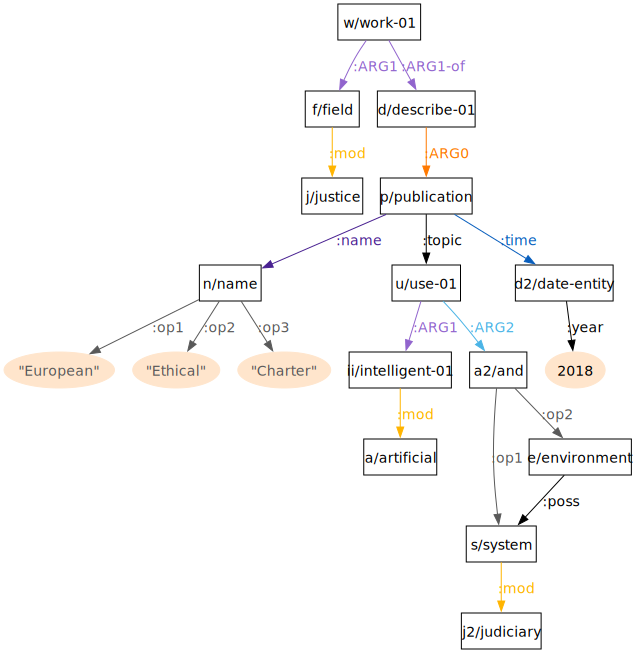

In [ ]:
from IPython.display import SVG, display

display(SVG(filename='data/arm img/1.svg'))

**Exemple 2**: "Case of the European Court of Justice on 17 October 1989." 

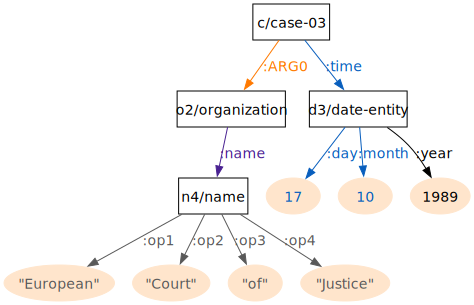

In [ ]:
display(SVG(filename='data/arm img/2.svg'))

**Exemple 3**: "I say that artificial intelligence applies to the field of justice in most private sector organizations, as a means to serve companies that insure, legal departments, lawyers, and genuine individuals." 

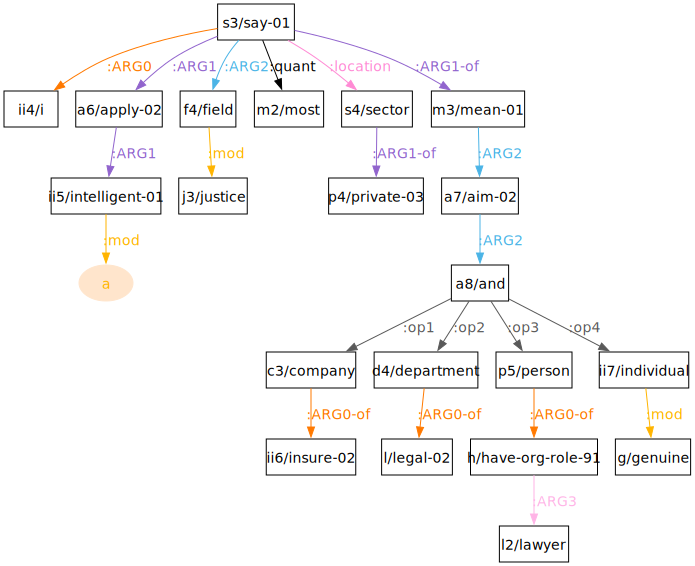

In [ ]:
display(SVG(filename='data/arm img/3.svg'))

**Exemple 4**: "Linnet Taylor asks about justice in the field of data." 

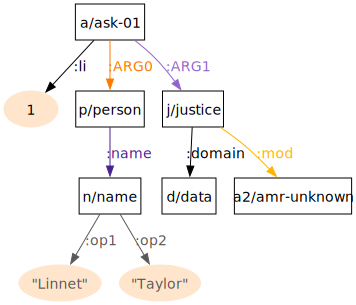

In [ ]:
display(SVG(filename='data/arm img/4.svg'))

**Exemple 5**: Publication in the newspaper Indian Express: The Dangers of a Centralised Database for Justice System.

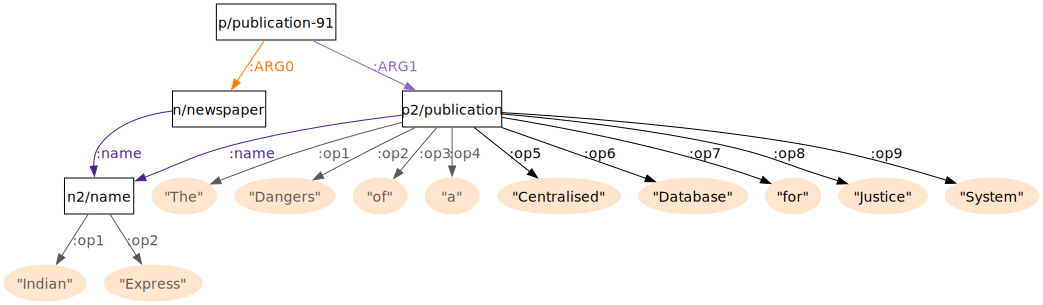

In [ ]:
display(SVG(filename='data/arm img/5.svg'))

**Exemple 6**: The contrast includes court statistics and empirical research on justice institutions used by individuals in pharmacies and further studies, but this does not stop there.

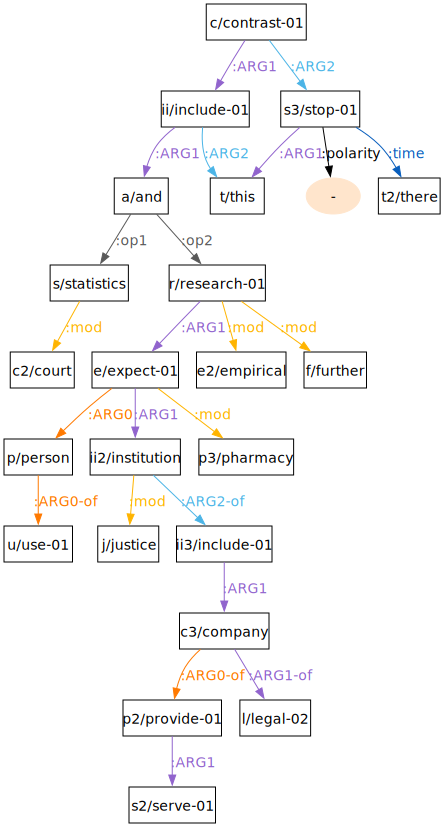

In [ ]:
display(SVG(filename='data/arm img/6.svg'))

**Exemple 7**: The publication The State of the Art by Berk and another person references the title Global Fairness in Criminal Justice Risk Assessments. It was published as a report by the AI Now Institute in 2017.

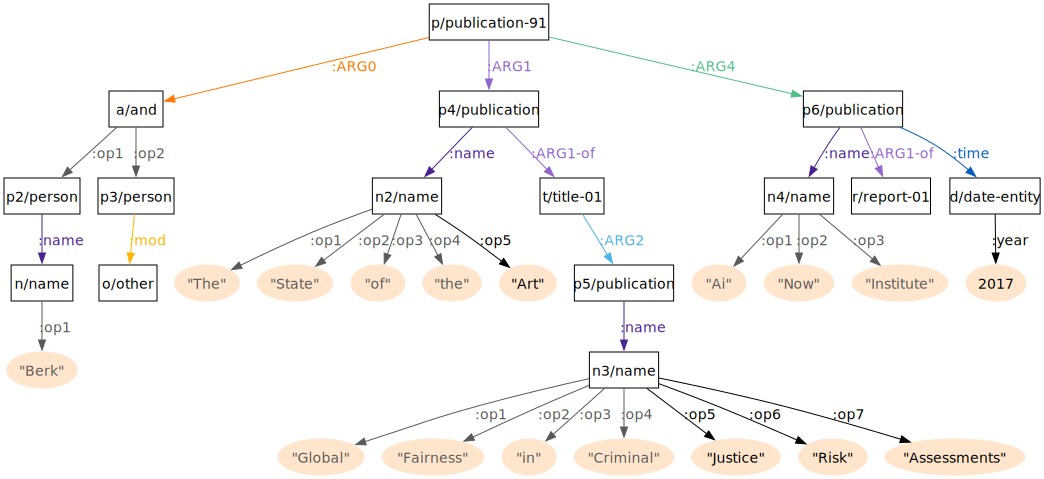

In [ ]:
display(SVG(filename='data/arm img/7.svg'))

**Exemple 8**: The European Court of Human Rights and the Court of Justice of the European Union voice concerns about state surveillance activities and their impact on privacy rights, at an international level, on numerous occasions.

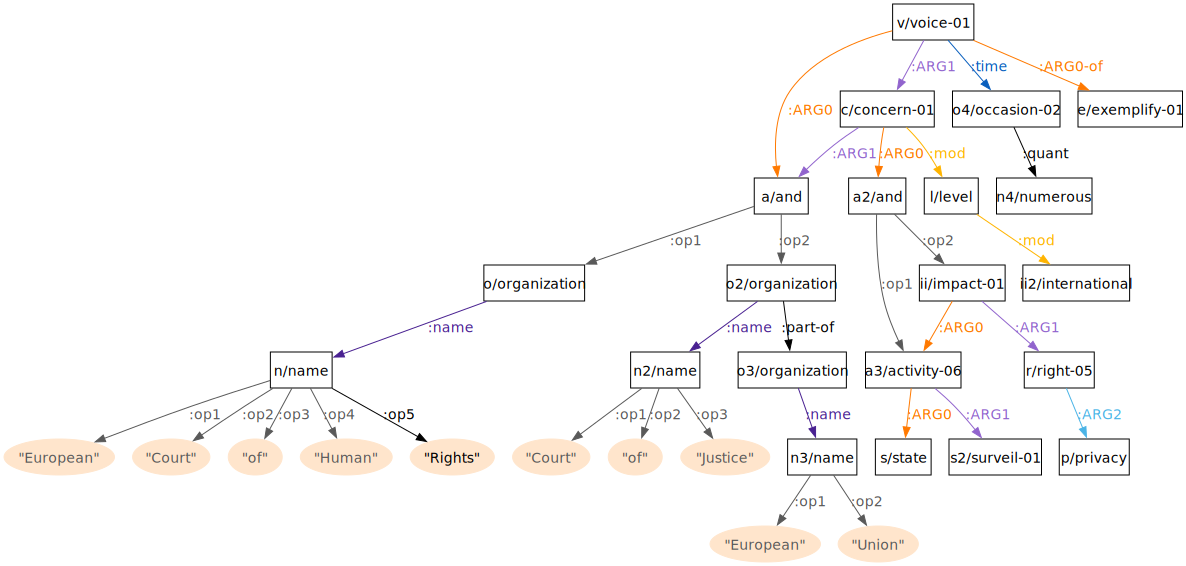

In [ ]:
display(SVG(filename='data/arm img/8.svg'))

**Exemple 9**: Another example: the former Minister of Economy of the Netherlands and the Secretary for Security and Justice state that people should turn off their smartphones unless they want to be tracked. They respond to worries about tracking via the Internet for online consumers.

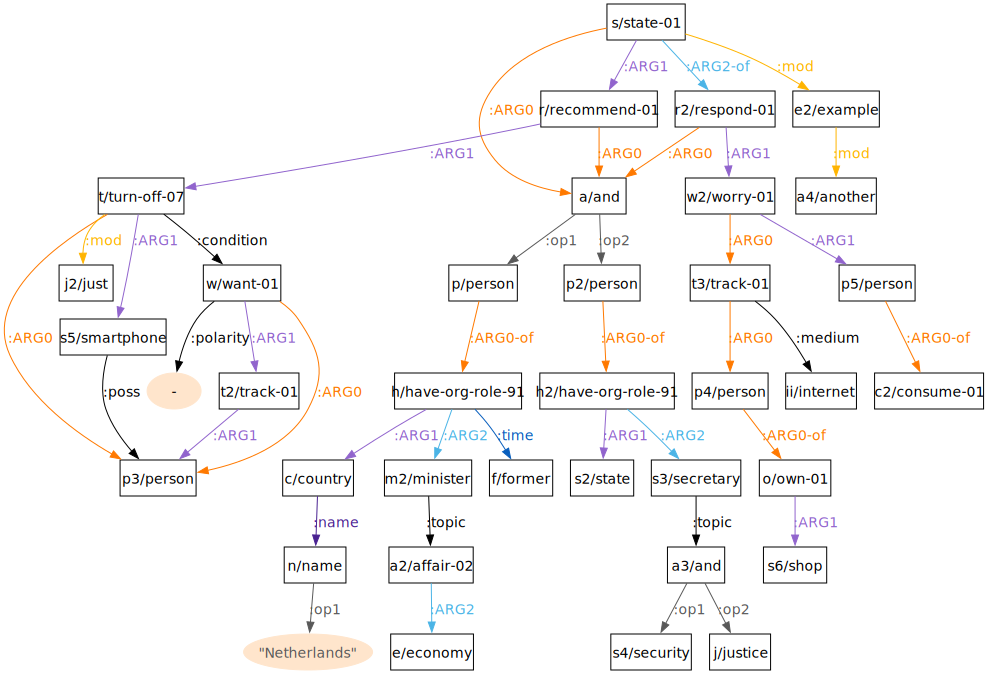

In [ ]:
display(SVG(filename='data/arm img/9.svg'))

**Exemple 10**: Section 3.8 of the paragraph describes access to justice and the right to a fair trial.

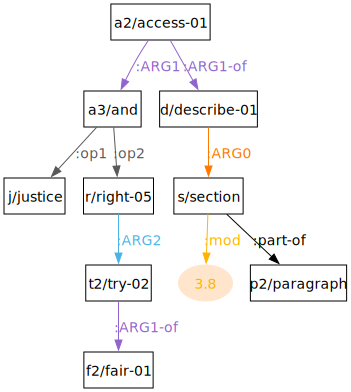

In [ ]:
display(SVG(filename='data/arm img/10.svg'))

### AMR Analysis of "Justice"

#### 1. Nature of "justice" in AMR
- Justice never appears as a verb or predicate; no PropBank frame exists.
- Always a noun concept `(j / justice)` or part of a named entity `:name`.
- Functions as a **modifier**, **argument**, or **named entity** depending on context.

#### 2. Key Axes and Examples

##### Conceptual / Abstract
- Justice as an idea, system, or value.
- Examples:
  - **Systemic / Structural**: justice modifies a system or field.
    - `(s / system :mod (j / justice))` → **Example 1**
    - Publication title: `"Justice System"` → **Example 5**
  - **Penal / Criminological**: justice appears in criminal justice contexts.
    - `"Criminal Justice"` in publication titles → **Example 7**
  - **Access / Rights**: justice as an object of inquiry or associated with fairness.
    - `(a2 / access-01 :ARG1 (and :op1 justice :op2 right-05 ...))` → **Examples 4, 10**
  - **Economic / Managerial**: justice as domain label for sectors or institutions.
    - `(ii2 / institution :mod (j / justice))` → **Example 6**

##### Institutional / Named Entity
- Justice as part of a court, ministry, or organization.
- Examples:
  - `(o2 / organization :name ... "Court of Justice")` → **Example 2**
  - `(v / voice-01 ... "Court of Justice")` → **Example 8**
  - `(s / state-01 ...)` → **Example 9**

#### 3. Insights
- AMR captures two main roles for justice:
  1. **Abstract concept / value** – used to describe systems, rights, fairness, or domain sectors (this corresponds to axes 1–3 in the bigrams and trigrams study from part 2).  
  2. **Institution / actor** – used in named entities like courts, ministries, or reports (axes 4–5).
- The way *justice* is represented in AMR depends on its role in the sentence:
  - **Modifier** (`:mod`): *justice* qualifies another concept, such as a system.  
    - Example: `(s / system :mod (j / justice))` → “justice system”
  - **Conceptual argument** (`:ARG1`): *justice* is the main concept being discussed, applied, or accessed.  
    - Example: `(a / ask-01 :ARG1 (j / justice ...))` → “asks about justice”
  - **Named entity** (`:name`): *justice* is part of the name of an organization or institution.  
    - Example: `(o2 / organization :name "Court of Justice")` → “Court of Justice”
- Even when *justice* refers to the **same underlying concept**, AMR may encode it differently depending on context:
  - **Example 1 vs 5**: Both denote the **justice system**, but:
    - In Example 1, *justice* is a **modifier** (`:mod`) of the system concept.  
    - In Example 5, *justice* is part of a **constant** in a publication title (`:name`).  
  - This shows that AMR captures **contextual differences in syntax or structure**, while the **semantic meaning remains identical**.